# 感知机

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [42]:
class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000, random_state=42):
        self.l_r = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state  # 随机种子
        self.w = None  # 权重向量
        self.b = 0  # 偏置项

    def _sign(self, x):
        '''符号函数：激活函数，输出二分类结果'''
        return 1 if x >= 0 else -1

    def fit(self, X, y):
        """训练感知机：随机梯度下降 """
        np.random.seed(self.random_state)
        self.w = np.random.randn(X.shape[1])  # 随机初始化

        for _ in range(self.max_iter):
            # 每轮每个样本依次迭代
            # 收敛标志位
            updated = False
            for x_i, y_i in zip(X, y):
                # 计算当前感知机预测输出
                y_pred = self._sign(np.dot(x_i, self.w) + self.b)
                # 若预测错误
                if y_i * (np.dot(x_i, self.w) + self.b) < 0:
                    self.w += self.l_r * y_i * x_i
                    self.b += self.l_r * y_i
                    updated = True
            if not updated:
                break

        return self.w, self.b

    def predict(self, X):
        return np.array([self._sign(np.dot(x, self.w) + self.b) for x in X])

In [43]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42,
    class_sep=2.0,
)

y = np.where(y == 0, -1, 1)
# if y==0 : y <- -1 else: y <- 1

# 划分训练集/测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 训练感知机
perceptron = Perceptron()
w, b = perceptron.fit(X_train, y_train)

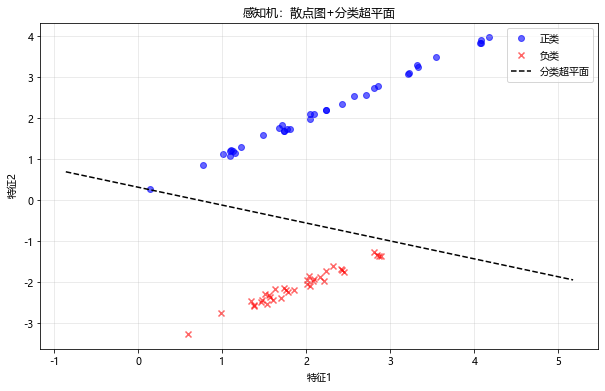

In [44]:
# 绘图
plt.figure(figsize=(10, 6))
# 绘制散点图
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color='blue', alpha=0.6, label='正类')
plt.scatter(X_train[y_train==-1][:,0], X_train[y_train==-1][:,1], marker='x', color='red', alpha=0.6, label='负类')
# 绘制直线图
x1 = np.linspace(X_train[:, 0].min()-1, X_train[:, 0].max()+1, 100)
x2 = (-b - x1 * w[0])/w[1]
plt.plot(x1, x2, color='black', linestyle='--', label='分类超平面')
# 图注、标题等美化
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('感知机：散点图+分类超平面')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [45]:
# 预测与评估
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"感知机分类准确率：{accuracy:.4f}")
print(f"训练后的权重w：{w.round(4)}")
print(f"训练后的偏置b：{b.round(4)}")

感知机分类准确率：1.0000
训练后的权重w：[0.1099 0.2513]
训练后的偏置b：-0.08
